In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Accediendo a los datos

In [2]:
df = pd.read_csv('data.csv')

Set de entrenamiento

In [3]:
X_train = df['Historial_crediticio']
Y_train = df['Estatus_prestamo']

Creación del modelo secuencial

In [4]:
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Compilando el modelo

In [5]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(),
               loss='mean_squared_error', metrics=['accuracy'])


Entrenamiento

In [9]:
epochs_hist = modelo.fit(X_train, Y_train, epochs=100)

keys = epochs_hist.history.keys()

weights = modelo.get_weights()
print(weights)


# Predicción
historial = 0
estatus = modelo.predict([historial])
print(estatus)
if estatus >= 0.5:
    print(
        f"Un historial crediticio de {historial} tiene {estatus[0][0]*100:.2f}% de probabilidad de ser aprobado")
else:
    print(
        f"Un historial crediticio de {historial} tiene {100-estatus[0][0]*100:.2f}% de probabilidad de ser aprobado")


Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1158 - accuracy: 0.8689
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.8689
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.8689
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.8689
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.8689
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.8689
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.8689
Epoch 8/100
18/18 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.8689
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.8689
Epoch 10/100
18/18 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.8689
Epoch 11/

Visualizacion

18/18 [==============================] - 0s 704us/step


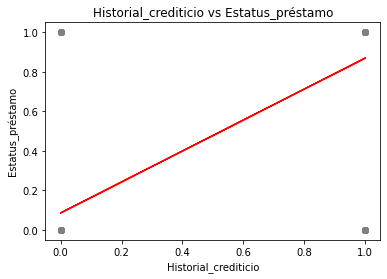

In [10]:
plt.title('Historial_crediticio vs Estatus_préstamo')
plt.xlabel('Historial_crediticio')
plt.ylabel('Estatus_préstamo')
plt.scatter(X_train, Y_train, color='grey')
plt.plot(X_train, modelo.predict(X_train), color='red')
